Linear SVM

In [59]:
from sklearn import svm
clf = svm.LinearSVC(class_weight="balanced", max_iter=100_000, dual=True, verbose=1)
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

[LibLinear]........................................................................................................................................................**.***.*
optimization finished, #iter = 1541
Objective value = -406.232285
nSV = 2848
...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SVM with RBF kernel

In [34]:
from sklearn import svm
clf = svm.SVC(class_weight="balanced", verbose=1)
clf.fit(train_x, train_y)
predict_stats(clf, test_x, test_y)

[LibSVM]...
*.*
optimization finished, #iter = 3969
obj = -1577.528151, rho = -2.871366
nSV = 3317, nBSV = 3020
....*.*
optimization finished, #iter = 4594
obj = -1942.854395, rho = -2.853862
nSV = 3766, nBSV = 3230
.*
optimization finished, #iter = 1571
obj = -2444.826936, rho = 1.774464
nSV = 621, nBSV = 298
Total nSV = 4938
Micro F1-score: 0.848
Macro F1-score: 0.5702113590312914


Custom MLP

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(512, input_shape=train_x[0].shape, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.65))
model.add(Dense(64, activation="relu", kernel_initializer="he_normal"))
model.add(Dropout(0.65))
model.add(Dense(3, activation="softmax", kernel_initializer="he_normal"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [29]:
epochs = 10
count = len(train_y)
class_weights = np.sum(train_y_ohe, axis=0)
class_weights = { i : (count - w) / count for i,w in enumerate(class_weights)}

In [30]:
feature = model.fit(
    train_x_np,
    train_y_ohe,
    epochs=epochs,
    batch_size=32,
    class_weight=class_weights,
    verbose=1,
    validation_data=(test_x_np, test_y_ohe)
)

Epoch 1/7


2022-05-09 23:57:37.740847: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 947508924 exceeds 10% of free system memory.


314/314 [==============================] - 18s 55ms/step - loss: 0.1362 - accuracy: 0.7955 - val_loss: 0.3690 - val_accuracy: 0.8730
Epoch 2/7
314/314 [==============================] - 18s 56ms/step - loss: 0.1133 - accuracy: 0.8130 - val_loss: 0.3860 - val_accuracy: 0.8580
Epoch 3/7
314/314 [==============================] - 17s 54ms/step - loss: 0.1093 - accuracy: 0.8119 - val_loss: 0.3427 - val_accuracy: 0.8810
Epoch 4/7
314/314 [==============================] - 17s 54ms/step - loss: 0.1022 - accuracy: 0.8335 - val_loss: 0.4424 - val_accuracy: 0.8140
Epoch 5/7
314/314 [==============================] - 18s 56ms/step - loss: 0.0953 - accuracy: 0.8383 - val_loss: 0.2838 - val_accuracy: 0.8840
Epoch 6/7
314/314 [==============================] - 17s 54ms/step - loss: 0.0903 - accuracy: 0.8444 - val_loss: 0.3145 - val_accuracy: 0.8810
Epoch 7/7
314/314 [==============================] - 16s 50ms/step - loss: 0.0884 - accuracy: 0.8512 - val_loss: 0.2938 - val_accuracy: 0.8830


In [31]:
results = pd.DataFrame({
    "training_accuracy": feature.history["accuracy"],
    "training_loss": feature.history["loss"],
    "test_accuracy": feature.history["val_accuracy"],
    "test_loss": feature.history["val_loss"],
    "epoch": list(range(1, epochs + 1))
})
results

,training_accuracy,training_loss,test_accuracy,test_loss,epoch
0,0.795538,0.136200,0.873,0.368986,1
1,0.812967,0.113317,0.858,0.386049,2
2,0.811871,0.109303,0.881,0.342703,3
3,0.833483,0.102231,0.814,0.442435,4
4,0.838263,0.095337,0.884,0.283813,5
5,0.844438,0.090264,0.881,0.314488,6
6,0.851210,0.088422,0.883,0.293769,7


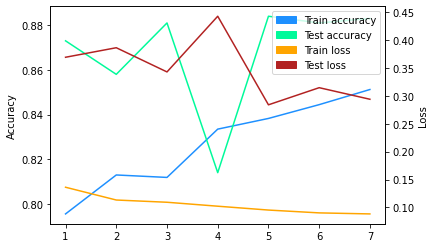

In [32]:
patches = [
    Patch(color='dodgerblue',label='Train accuracy'),
    Patch(color='mediumspringgreen',label='Test accuracy'),
    Patch(color='orange',label='Train loss'),
    Patch(color='firebrick',label='Test loss')
]

fig, ax1 = plt.subplots()

ax1.plot(results["epoch"],results["training_accuracy"],'dodgerblue')
ax1.plot(results["epoch"],results["test_accuracy"],'mediumspringgreen')
ax1.set_ylabel("Accuracy")

ax2 = ax1.twinx()
ax2.plot(results["epoch"],results["training_loss"],'orange')
ax2.plot(results["epoch"],results["test_loss"],'firebrick')
ax2.set_ylabel("Loss")

plt.legend(handles=patches)
plt.show()

In [33]:
predictions = np.argmax(model.predict(test_x_np), axis=1)
y_true = np.argmax(test_y_ohe, axis=1)
stats(y_true, predictions)

Micro F1-score: 0.883
Macro F1-score: 0.5384718635815128
